# INM430 - Tiny DS Project Progress Report



## Part-1: Data source and domain description (maximum 150 words):

As a Lithuanian,and a basketball fan since I was 7, I have decided to look at the NBA data. I Will be using 2 datasets for my analysis. I have selected the first dataset from www.Kaggle.com, which contains data of all the playes who took a shot during the 2014 - 2015 season.  Data also contains where was the shot taken from,shot result (Made it or failed it), the nearest defender, distance from defender, time on the shot clock and a few more. I have created the second data set by scraping the data from www.basketball-reference.com. I have used a python module called beautifulsoup (https://pypi.python.org/pypi/beautifulsoup4) in order to scrape the data. The second dataset contains the average game statistics for each basketball player during 2014 - 2015 season. I have joined the dataset by the Name of the player. With this data I will try to identify what factors influence players' success in making a shot. 

***

## Part-2: Analysis Strategy and Plans (maximum 200 words):

In this project I will try to investigate what factors influence whether the player makes the shot or not. For example whether playing home helps players be more accurate than playing away, if players tend to score better at the end of the middle of score timer or at the very end. By joining two datasets together I will get the average statistics for each player per game (as well as other information (e.g the team they play for and possition they play)) as well as each shot they have made during 2014 - 2015 season. I will try to apply regression analysis as well as other methods that I might learn later in this year. 

***
***

## Part-3: Initial investigations on the data sources (maximum 150 words): 

I have looked at both datasets and found out that there have been a few misspellings in the dataset, I have taken from Kaggle. I have since updated these by creating a function that alters names to match the scraped dataset. Another problem that I have encountered is that some players have played for more than one team during this season - therefore ,  when merging data, the team players play for is likely to be incorrect, I will need to find out the time of the game (which is indicated in the 'matchup'column, which I will have to split in order to get the time game has occured) and cross-reference with instances mentioned in the scraped dataset. Also, not every shot has a shot clock value, therefore I will need to apply missing value treatment. I will need to decide weather I need to ignore these cases and remove them from the dataset or use mean/median shot clock value for each type of point (perhaps look at this by player: e.g replace Jonas Valanciunas' 2 point missing shot clock values with Jonas Valanciunas' median 2 point shot clock value). 
***
***

# Part-4: Python code for initial investigations





# 4.1 Loading important libraries

In [17]:
# This cell is where you can copy + paste your Python code which loads your data and produces 
# When you press CTRL+Enter, this cell will execute and produce some output
# You can develop your code in Spyder (or another IDE) and copy + paste over here

# Step-1: Load your data
# Step-2: Get an overview of the data features, some suggestions to look for:
#         number of features, data types, any missing values?, 
#         any transformations needed?

# Start with your import (s) here.

# The following is essential to get your matplotlib plots inline, so do not miss this one if you have graphics.


# Some usual imports here##Importing libraries
import pandas as pd
import numpy as np
import scipy as sp
import urllib
import urllib.request
from bs4 import BeautifulSoup
from sklearn import datasets
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import time
from scipy import stats

# 4.2 Scraping the data In order to find 2014 - 2015 NBA stats 
Data from http://www.basketball-reference.com/leagues/NBA_2015_per_game.html 

In [18]:
def make_soup(url):
    thepage = urllib.request.urlopen(url)
    soupdata = BeautifulSoup(thepage,'html.parser')
    return soupdata
#Takes a while ...
##Loup to get each cell of the table
soup = make_soup('http://www.basketball-reference.com/leagues/NBA_2015_per_game.html')
statspg = statspgasaved = ''
for row in soup.findAll('tr'): ##Find rows
    statspg = ''
    for column in row.findAll('td'): ##Find columns
        statspg = statspg +','+column.text
    if len(statspg)!=0:
        statspgasaved = statspgasaved+'\n'+statspg[0:]



## 4.2.1 Exporting scraped data to CSV -  To then be imported back to be used as dataframe. 

In [19]:
import os
header = "Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS"
file = open(os.path.expanduser("Stats_per_game.csv"),"wb") ## creating a new file to write the data in
file.write(bytes(header,encoding = 'utf-8', errors ='ignore' )) ##Adding header
file.write(bytes(statspgasaved,encoding = 'utf-8', errors ='ignore' )) 
STATSPERGAME = pd.read_csv('Stats_per_game.csv',encoding = 'utf-8')
del STATSPERGAME['Rk'] #empty useless column 
#STATSPERGAME.shape[0]-STATSPERGAME.count() ##Looking for missing values. 
STATSPERGAME.head(n=2)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Quincy Acy,PF,24,NYK,68,22,18.9,2.2,4.9,0.459,...,0.784,1.2,3.3,4.4,1.0,0.4,0.3,0.9,2.2,5.9
1,Jordan Adams,SG,20,MEM,30,0,8.3,1.2,2.9,0.407,...,0.609,0.3,0.6,0.9,0.5,0.5,0.2,0.5,0.8,3.1


# 4.3 Loading NBA season 2014 - 2015 data 
taken from: https://www.kaggle.com/dansbecker/nba-shot-logs

In [20]:
basketballdf = pd.read_csv('shot_logs.csv',encoding = 'utf-8-sig')
basketballdf.head(n=2)
#Need to change the names to be uppercase for each dataset so I can merge on them. 
basketballdf['player_name'] = basketballdf['player_name'].str.upper()
basketballdf.head(n=2)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER_SURNAME,CLOSEST_DEFENDER_NAME,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,01:09,10.8,2,...,2,made,Anderson,Alan,101187,1.3,1,2,BRIAN ROBERTS,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,00:14,3.4,0,...,3,missed,Bogdanovic,Bojan,202711,6.1,0,0,BRIAN ROBERTS,203148


# 4.3.1 Kaggle data management


## 4.3.1.a  Splitting data columns 

In [21]:
basketballdf['Date'], basketballdf['game'] = zip(*basketballdf['MATCHUP'].map(lambda x: x.split('-')))
basketballdf['Minutes'], basketballdf['seconds'] = zip(*basketballdf['GAME_CLOCK'].map(lambda x: x.split(':')))
 
def minsec(a):
    if a[0] == "0":
        return float(a[1])
    else:
        return float(a)
    
sec = basketballdf.apply(lambda x: minsec(x['seconds']), axis=1)
basketballdf['seconds'] = sec
mint = basketballdf.apply(lambda x: minsec(x['Minutes']), axis=1)
basketballdf['Minutes'] = mint


## 4.3.1.b Re-formatting defender names to have the same format as player names

In [22]:
##Had to split the column in excel (There was a bug of some kind that did not allow me to do so in python!!). 
#Now joiningg it tohether so instead of surname,name column format is name,surname. 
basketballdf['CLOSEST_DEFENDER'] =basketballdf["CLOSEST_DEFENDER_NAME"].map(str) + " "+ basketballdf["CLOSEST_DEFENDER_SURNAME"]
del basketballdf["CLOSEST_DEFENDER_NAME"]
del basketballdf["CLOSEST_DEFENDER_SURNAME"]
basketballdf['CLOSEST_DEFENDER']=basketballdf['CLOSEST_DEFENDER'].str.upper()
#basketballdf.head(n=2) ##test if merging columns worked

## 4.3.1.c Correcting misspelled names

By pre-merging data files I have discovered that there were a few names that have been misspelled or spelled differently than names in scraped dataset.  I have googled the misspelled names to double check the spelling.  the below cell has a funcion that replaces misspelled/differently - spelled names to make them uniform.

In [23]:

##Creating a function to fix misspelled names (crosschecked with www.basketball-reference.com)
def typos(a):
    if a == "JON INGLES":
        return "JOE INGLES"
    elif a=="JIMMER DREDETTE":
        return "JIMMER FREDETTE"
    elif a=="MNTA ELLIS":
        return "MONTA ELLIS"
    elif a=="JOSE JUAN BAREA":
        return "J.J. BAREA"
    elif a=="AL FAROUQ AMINU":
        return"AL-FAROUQ AMINU"
    elif a=="DIRK NOWTIZSKI":
        return"DIRK NOWITZKI"
    elif a=="KYLE OQUINN":
        return"KYLE O'QUINN"
    elif a=="CJ WATSON":
        return"C.J. WATSON"
    elif a=="CJ MILES":
        return"C.J. MILES"
    elif a=="DANILO GALLINAI":
        return"DANILO GALLINARI"
    elif a=="JJ HICKSON":
        return"J.J. HICKSON"
    elif a=="PJ TUCKER":
        return"P.J. TUCKER"
    elif a=="NERLES NOEL":
        return"NERLENS NOEL"
    elif a=="KJ MCDANIELS":
        return"K.J. MCDANIELS"
    elif a=="OJ MAYO":
        return"O.J. MAYO"
    elif a=="BENO URDIH":
        return"BENO UDRIH"
    elif a=="AMARE STOUDEMIRE":
        return"AMAR'E STOUDEMIRE"
    elif a=="TIME HARDAWAY JR":
        return"TIM HARDAWAY"
    elif a=="DJ AUGUSTIN":
        return"D.J. AUGUSTIN"
    elif a=="DWAYNE WADE":
        return"DWYANE WADE"
    elif a=="STEVE ADAMS":
        return"STEVEN ADAMS"
    elif a=="JJ REDICK":
        return"J.J. REDICK"
    elif a=="CJ MCCOLLUM":
        return"C.J. MCCOLLUM"
    elif a=="ALAN CRABBE":
        return"ALLEN CRABBE"
    else:
        return a    
#Player name
player_name = basketballdf.apply(lambda x: typos(x['player_name']), axis=1)
basketballdf['player_name'] = player_name
#Defender name
defender_name = basketballdf.apply(lambda x: typos(x['CLOSEST_DEFENDER']), axis=1)
basketballdf['CLOSEST_DEFENDER'] = defender_name


# 4.4 Merging NBA kaggle data with NBA scraped data.


In [24]:
STATSPERGAME['Player'] = STATSPERGAME['Player'].str.upper()
MASTERBBDF = pd.merge(basketballdf, STATSPERGAME, left_on = 'player_name', right_on='Player', how='left')
MASTERBBDF.to_csv('MASTER_BASKETBALL_DATASET.csv')
##checking for missing values

# % of missing values
a = ((MASTERBBDF.shape[0] -MASTERBBDF.count())/MASTERBBDF.count())*100

a

GAME_ID                       0.000000
MATCHUP                       0.000000
LOCATION                      0.000000
W                             0.000000
FINAL_MARGIN                  0.000000
SHOT_NUMBER                   0.000000
PERIOD                        0.000000
GAME_CLOCK                    0.000000
SHOT_CLOCK                    4.431259
DRIBBLES                      0.000000
TOUCH_TIME                    0.000000
SHOT_DIST                     0.000000
PTS_TYPE                      0.000000
SHOT_RESULT                   0.000000
CLOSEST_DEFENDER_PLAYER_ID    0.000000
CLOSE_DEF_DIST                0.000000
FGM                           0.000000
PTS_x                         0.000000
player_name                   0.000000
player_id                     0.000000
Date                          0.000000
game                          0.000000
Minutes                       0.000000
seconds                       0.000000
CLOSEST_DEFENDER              0.000000
Player                   

# 4.5 Preparing for Analysis.


## 4.5.1 Normalising data

### Legend:

** Location: ** 
    1 = Home
    0 = Away

** Win/Lose: ** 
    1 = Win
    -1 = Lose
    
** Shot result: ** 
    1 = Made
    -1 = Missed

In [25]:
MASTERBBDF['LOCATION'] = MASTERBBDF['LOCATION'].replace('A', 0)
MASTERBBDF['LOCATION'] = MASTERBBDF['LOCATION'].replace('H', 1) 

MASTERBBDF['W'] = MASTERBBDF['W'].replace('W', 1)
MASTERBBDF['W'] = MASTERBBDF['W'].replace('L', -1)

MASTERBBDF['SHOT_RESULT'] = MASTERBBDF['SHOT_RESULT'].replace('made', 1)
MASTERBBDF['SHOT_RESULT'] = MASTERBBDF['SHOT_RESULT'].replace('missed', -1)

## 4.5.2 Missing value treatment

There are quite a few shot clock values missing


### 4.5.2 Model 1:  14 second rule, or a block

1st model assumes that some shots were straight away (replace with 24). 14 second rule was applied if more than 24 seconds left to play in the quater.  Other missing values replaced with game clock value values

If the shot clock is below 14 seconds, it is recycled to 14 seconds 

In [26]:
MASTERBBDF['SHOT_CLOCK_test1'] = MASTERBBDF['SHOT_CLOCK'] 
#Blocked
MASTERBBDF['SHOT_CLOCK_test1'] = np.where(abs((MASTERBBDF['SHOT_CLOCK_test1'].isnull())&(MASTERBBDF['CLOSE_DEF_DIST'] <=3.28084) & (MASTERBBDF['SHOT_RESULT'] ==-1)& (MASTERBBDF['TOUCH_TIME'] ==0)), 24,MASTERBBDF['SHOT_CLOCK_test1'])
#less than 24 seconds left
MASTERBBDF['SHOT_CLOCK_test1'] = np.where(abs((MASTERBBDF['SHOT_CLOCK_test1'].isnull())&(MASTERBBDF['GAME_CLOCK'] <='00:24')),MASTERBBDF['seconds'],MASTERBBDF['SHOT_CLOCK_test1'])
#14 second rule
MASTERBBDF['SHOT_CLOCK_test1'] = MASTERBBDF['SHOT_CLOCK_test1'].fillna(14) 


### 4.5.2  Model 2: Replace all missing values with shot clock median 

This model replaces missing values with median value if more than 24 seconds left in the game and game clock value if less than 24 seconds left in the game

In [27]:
MASTERBBDF['SHOT_CLOCK_test2'] = MASTERBBDF['SHOT_CLOCK'] 
#replace with median
MASTERBBDF['SHOT_CLOCK_test2'] = MASTERBBDF['SHOT_CLOCK_test2'].fillna(MASTERBBDF['SHOT_CLOCK_test2'].median()) 

### 4.5.2 Model 3: Replacing with Touch time values

This model will use 24- Touch time value to replace missing values. If Touch time is more tan 24 and less than 0, methods grom th first model will  be applied.

In [28]:
#Create a variable that selects the last two digits of game clock
MASTERBBDF['SHOT_CLOCK_test3'] = MASTERBBDF['SHOT_CLOCK']
#Blocked
MASTERBBDF['SHOT_CLOCK_test3'] = np.where(abs((MASTERBBDF['SHOT_CLOCK_test3'].isnull())&(MASTERBBDF['CLOSE_DEF_DIST'] <=3.28084) & (MASTERBBDF['SHOT_RESULT'] ==-1)& (MASTERBBDF['TOUCH_TIME'] ==0)), 24,MASTERBBDF['SHOT_CLOCK_test3'])
#less than 24 seconds left
MASTERBBDF['SHOT_CLOCK_test3'] = np.where(abs((MASTERBBDF['SHOT_CLOCK_test3'].isnull())&(MASTERBBDF['GAME_CLOCK'] <='00:24')),MASTERBBDF['seconds'],MASTERBBDF['SHOT_CLOCK_test3'])
#14 second rule
MASTERBBDF['SHOT_CLOCK_test3'] = MASTERBBDF['SHOT_CLOCK_test3'].fillna(14) 
MASTERBBDF['SHOT_CLOCK_test3'].max()

24.0

### Model 4: Replacing the median value for each player.

Replacing missing values with the median shot clock value for each player.

In [29]:
MASTERBBDF['TOT_GAME_SECODS'] =(((MASTERBBDF['Minutes'])*60)+MASTERBBDF['seconds'])*MASTERBBDF['PERIOD']

In [30]:
test4 = MASTERBBDF.pivot_table(values = ['SHOT_CLOCK'], index=['Player'], aggfunc='median')
test4.reset_index(level=0, inplace=True)
test4['SHOT_CLOCK_median'] =test4['SHOT_CLOCK']
del test4['SHOT_CLOCK']
test4['SHOT_CLOCK_median'].max()

18.300000000000001

In [31]:
MASTERBBDF = pd.merge(MASTERBBDF,test4, left_on = 'Player',  right_on = 'Player',how = 'left')


SHOT_CLOCK_test4     12.030337
Player              568.872659
dtype: float64

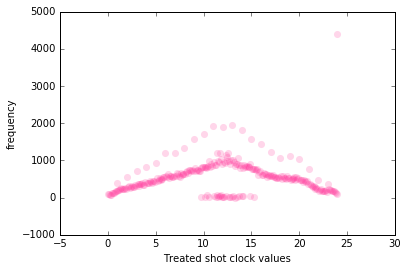

In [32]:
MASTERBBDF['SHOT_CLOCK_test4'] = MASTERBBDF['SHOT_CLOCK'] 
#replace with median
#Create a variable that selects the last two digits of game clock
#less than 24 seconds left
#MASTERBBDF['SHOT_CLOCK_test4'] = np.where(abs((MASTERBBDF['SHOT_CLOCK_test4'].isnull())&(MASTERBBDF['GAME_CLOCK'] <='00:24')),MASTERBBDF['seconds'],MASTERBBDF['SHOT_CLOCK_test4'])
#Else -  Median value
MASTERBBDF['SHOT_CLOCK_test4'] = np.where(abs(MASTERBBDF['SHOT_CLOCK_test4'].isnull()), MASTERBBDF['SHOT_CLOCK_median'],MASTERBBDF['SHOT_CLOCK_test4'])



test5 = MASTERBBDF.pivot_table(values = ['Player'], index=['SHOT_CLOCK_test4'], aggfunc = 'count')
test5.reset_index(level=0, inplace=True)


plt.figure(1)
plt.suptitle('')
plt.xlabel('Treated shot clock values')
plt.ylabel('frequency')
plt.scatter(test5['SHOT_CLOCK_test4'],test5['Player'],c='#ff3399',s=50,alpha=0.2,linewidth='0')
test5.mean()
#MASTERBBDF['SHOT_CLOCK'].mean()

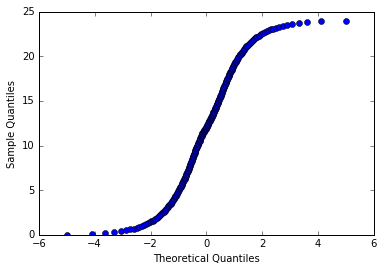

In [266]:
##QQplot 
import scipy.stats as stats
a = test5['SHOT_CLOCK_test4']
fig = sm.qqplot(a, stats.t, distargs=(4,))
plt.show()

### Model 5: Using Scikit-learn to replace missing values

Replacing missing values with the median shot clock value for each player.

In [ ]:
import numpy as np
from sklearn.preprocessing import Imputer
#Game clock in seconds


x=MASTERBBDF[['SHOT_CLOCK','SHOT_DIST','SHOT_RESULT','TOT_GAME_SECODS','player_id']]
Data = np.array(x)
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
Data = imp.fit_transform(Data)

missing_vals = pd.DataFrame(Data, columns=['SHOT_CLOCK_TEST6','SHOT_DIST','SHOT_RESULT','TOT_GAME_SECODS','player_id'])

test6 = missing_vals.pivot_table(values = ['player_id'], index=['SHOT_CLOCK_TEST6'], aggfunc = 'count')
test6.reset_index(level=0, inplace=True)

plt.figure(1)
plt.suptitle('')
plt.xlabel('Treated shot clock values')
plt.ylabel('frequency')
plt.scatter(test6['SHOT_CLOCK_TEST6'],test6['player_id'],c='#ff3399',s=50,alpha=0.2,linewidth='0')


In [ ]:

MASTERBBDF.count()

### 4.5.2 Model visualisation

#### Creating test tables




In [ ]:

test0 = MASTERBBDF.pivot_table(values = ['Player'], index=['SHOT_CLOCK'], aggfunc = 'count')
test0.reset_index(level=0, inplace=True)

test1 = MASTERBBDF.pivot_table(values = ['Player'], index=['SHOT_CLOCK_test1'], aggfunc = 'count')
test1.reset_index(level=0, inplace=True)

test2 = MASTERBBDF.pivot_table(values = ['Player'], index=['SHOT_CLOCK_test2'], aggfunc = 'count')
test2.reset_index(level=0, inplace=True)

test3 = MASTERBBDF.pivot_table(values = ['Player'], index=['SHOT_CLOCK_test3'], aggfunc = 'count')
test3.reset_index(level=0, inplace=True)


#### Visualising

In [ ]:

plt.figure(2)
plt.suptitle('Shot clock values  - No treatment')
plt.xlabel('Values')
plt.ylabel('frequency')
plt.scatter(test0['SHOT_CLOCK'],test0['Player'],c='#4286f4',s=50,alpha=0.2,linewidth='0')

plt.figure(1)
plt.suptitle('Model 1')
plt.xlabel('Values')
plt.ylabel('frequency')
plt.scatter(test1['SHOT_CLOCK_test1'],test1['Player'],c='#f4d942',s=50,alpha=0.2,linewidth='0')


plt.figure(1)
plt.suptitle('')
plt.xlabel('Treated shot clock values')
plt.ylabel('frequency')
plt.scatter(test6['SHOT_CLOCK_TEST6'],test6['player_id'],c='#42f44e',s=50,alpha=0.2,linewidth='0')


plt.figure(1)
plt.suptitle('Model 2')
plt.xlabel('Values')
plt.ylabel('frequency')
plt.scatter(test2['SHOT_CLOCK_test2'],test2['Player'],c='#f44250',s=50,alpha=0.2,linewidth='0')

plt.figure(1)
plt.suptitle('Model 3')
plt.xlabel('Values')
plt.ylabel('frequency')
plt.scatter(test3['SHOT_CLOCK_test3'],test3['Player'],c='#f442e8',s=50,alpha=0.2,linewidth='0')


In [ ]:

plt.figure(1)
plt.suptitle('Shot clock values  - No treatment')
plt.xlabel('Values')
plt.ylabel('frequency')
plt.scatter(test0['SHOT_CLOCK'],test0['Player'],c='#f44250',s=50,alpha=0.2,linewidth='0')
                  
   
plt.figure(1)
plt.suptitle('')
plt.xlabel('Treated shot clock values')
plt.ylabel('frequency')
plt.scatter(test6['SHOT_CLOCK_TEST6'],test6['player_id'],c='#42b9f4',s=50,alpha=0.2,linewidth='0')


## 4.5.3 Changing touch time values

By creating missing value treatment I have noticed that a few values in touch time variable were either negative or higher tha 24. In his segment I will teplace these with Model 3 shot clock values

In [ ]:
MASTERBBDF['TOUCH_TIME'] = np.where(abs(MASTERBBDF['TOUCH_TIME'] <0),MASTERBBDF['SHOT_CLOCK_test4'] ,MASTERBBDF['TOUCH_TIME'])
MASTERBBDF['TOUCH_TIME'] = np.where(abs(MASTERBBDF['TOUCH_TIME'] >24),MASTERBBDF['SHOT_CLOCK_test4'] ,MASTERBBDF['TOUCH_TIME'])
MASTERBBDF['TOUCH_TIME'].max()

## 4.5.4 NBA teams

There were some pleyers who played in 2 different teams during the 2015 NBA season. In this section I will assign these players to the team that layer has played for the longest.

In [ ]:
## Finding players that played in multiple teams over the years
multitm = MASTERBBDF[(MASTERBBDF['Tm'] =="TOT")]
multitm = multitm[['Tm','Player','Date']]
multitm.to_excel('players2team.xls')

I have extracted player names and looked at number of games played in each team.  I have decided to sort them into teams that they have spent more time in.

In [ ]:
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="GARY NEAL")),"CHO",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="KEVIN GARNETT")),"BRK",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="ENES KANTER")),"UTA",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="ANDRE MILLER")),"WAS",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="MARCUS THORNTON")),"BOS",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="JEFF GREEN")),"MEM",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="ALONZO GEE")),"DEN",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="NATE ROBINSON")),"DEN",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="TIMOFEY MOZGOV")),"CLE",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="ARRON AFFLALO")),"DEN",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="GORAN DRAGIC")),"PHO",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="ISAIAH THOMAS")),"PHO",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="MICHAEL CARTER-WILLIAMS")),"PHI",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="K.J. MCDANIELS")),"PHI",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="BRANDON KNIGHT")),"MIL",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="AMAR'E STOUDEMIRE")),"NYK",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="PABLO PRIGIONI")),"NYK",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="D.J. AUGUSTIN")),"DET",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="JONAS JEREBKO")),"DET",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="KYLE SINGLER")),"DET",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="SHAWNE WILLIAMS")),"MIA",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="NORRIS COLE")),"MIA",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="RAMON SESSIONS")),"SAC",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="REGGIE JACKSON")),"OKC",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="KENDRICK PERKINS")),"OKC",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="MO WILLIAMS")),"MIN",MASTERBBDF['Tm'])
MASTERBBDF['Tm'] = np.where(abs((MASTERBBDF['Player']=="THADDEUS YOUNG")),"MIN",MASTERBBDF['Tm'])
#Test if all TOT replaced
#subset = MASTERBBDF[(MASTERBBDF['Tm']=="TOT")]
#subset = subset[['Tm','Player','Date']]
#subset

### 4.5.5 Altering shot distance for 2 - 3 points

Acccording to the official NBA rules,  3 point line is at 23 feet and 9 inches.  I have discovered that some 2 point shots in the data hadhigher distance than 23 feet and 9 inches,  similar,  3 point shots had a distance lower than 23 feet and 9 inches.  In this segment I will re - assing all shots under 23 feet and 9 inches as 2 point and  over 23 feet and 9 inches as 3 point. 

In [ ]:
MASTERBBDF['PTS_TYPE'] = np.where(abs((MASTERBBDF['PTS_TYPE'] ==3)&(MASTERBBDF['SHOT_DIST'] <23.75)), 2,MASTERBBDF['PTS_TYPE'])
MASTERBBDF['PTS_TYPE'] = np.where(abs((MASTERBBDF['PTS_TYPE'] ==2)&(MASTERBBDF['SHOT_DIST'] >23.75)), 3,MASTERBBDF['PTS_TYPE'])

# 4.6 Derrived variables

Note: Visualisation will be done in Tableu, any plots in this section are just test plots.

## 4.6.1 Net shots made


In [ ]:
##net shots made. 
Shots_made_net = MASTERBBDF.pivot_table(values = ['SHOT_RESULT'], index=['Player'], aggfunc = 'sum')
Shots_made_net.reset_index(level=0, inplace=True)
Shots_made_net = Shots_made_net.sort(['SHOT_RESULT', 'Player'], ascending=[1, 0])
#Show top net shots made
Shots_made_net_top = Shots_made_net[(Shots_made_net['SHOT_RESULT'])>=0]
Shots_made_net_top
Shots_made_net_top.plot(['Player'],  style='b',kind = 'bar')

## 4.6.2 Net points scored

In [ ]:
 def points_scored(a,b):
        return a*b
    
points_scored = MASTERBBDF.apply(lambda x: points_scored(x['SHOT_RESULT'],x['PTS_TYPE']), axis=1)
MASTERBBDF['points_scored'] =points_scored
##net points scored. 
points_scored = MASTERBBDF.pivot_table(values = ['points_scored'], index=['Player'], aggfunc = 'sum')
points_scored.reset_index(level=0, inplace=True)
points_scored = points_scored.sort(['points_scored', 'Player'], ascending=[1, 0])
points_scored

## 4.6.3 Best defender score

Creating a score that would help identify the best defender.

In [ ]:
def defender_scr(a,b):
    if a == -1 and b==0: ##0 distance between players means that this COULD be a foul
        return -1
    if a==-1:
        return 1
    elif a==1:
        return -1
    else:
        return 0
    
defender_scr = MASTERBBDF.apply(lambda x: defender_scr(x['SHOT_RESULT'],x['CLOSE_DEF_DIST']), axis=1)
MASTERBBDF['defender_scr'] =defender_scr

defender_scr = MASTERBBDF.pivot_table(values = ['defender_scr'], index=['CLOSEST_DEFENDER'], aggfunc = 'sum')
defender_scr.reset_index(level=0, inplace=True)
defender_scr = defender_scr.sort(['defender_scr', 'CLOSEST_DEFENDER'], ascending=[1, 0])
defender_scr

### 4.6.3.a most blocks 

Curious to see who had the most blocks!  Block happens when a deffender manages to change the course of the ball without touching the offender. Assuming that the defender is within a close proximity of the offender, we could try and indentify blocks! 

***Criteria:*** 

1. Shot must be missed
2. defender is within 1 meter distance away from the offender
3. must be in the Three Second Area (which is about 15 feet away from the basket)
3. Distance cannot be 0 (in that case we can assume that deffensive foul has happened)


***Note: ***The distance is recorded in feet.

1 metre = 3.28084 feet



In [ ]:
def block(a,b):
    if a==-1 and (b>0 and b<=3.28084) :
        return 1
    else:
        return 0

block = MASTERBBDF.apply(lambda x: block(x['SHOT_RESULT'],x['CLOSE_DEF_DIST']), axis=1)
MASTERBBDF['block'] =block

block = MASTERBBDF.pivot_table(values = ['block'], index=['CLOSEST_DEFENDER'], aggfunc = 'sum')
block.reset_index(level=0, inplace=True)
block = block.sort(['block', 'CLOSEST_DEFENDER'], ascending=[1, 0])
block

## 4.6.4 Investigating shot difficulty. 

### Looking at shot distance 

1. Close (up to 15 feet)
2. Mid- range (15-23 feet)
3. far (23+)



In [37]:
def shot_dist_bin(a):
    if  a<=5:
        return 'a. <5'
    elif  a>5 and a<= 10:
        return 'b. 5-10'
    elif  a>10 and a<= 15:
        return 'c. 10-15'
    elif a >15 and a<=20:
        return 'd. 15 - 20'
    elif a>20 and a<=23.75 :
        return "e. 20 - 23'9"
    elif a>23.75  and a<=30: ## 23.75 - NBA 3 point line
        return "f. 23'9 - 30"
    elif a>30:
        return 'g. 30+'
    else:
        return "check"

def shots_attempted(a):
    if  a>=-1:
        return 1
    else:
        return 0
shot_dist_bin = MASTERBBDF.apply(lambda x: shot_dist_bin(x['SHOT_DIST']), axis=1)
MASTERBBDF['shot_dist_bin'] =shot_dist_bin
shots_attempted = MASTERBBDF.apply(lambda x: shots_attempted(x['SHOT_RESULT']), axis=1)
MASTERBBDF['shots_attempted'] =shots_attempted

shot_dist_bin = MASTERBBDF[(MASTERBBDF['SHOT_RESULT']==1)]
shot_dist_bin2 = MASTERBBDF[(MASTERBBDF['SHOT_RESULT']==-1)]
shot_dist_bin = shot_dist_bin.pivot_table(values = ['SHOT_RESULT'], index=['shot_dist_bin'], aggfunc = 'sum')
shot_dist_bin.reset_index(level=0, inplace=True)
shot_dist_bin

shots_attempted = MASTERBBDF.pivot_table(values = ['shots_attempted'], index=['shot_dist_bin'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


shotperc = pd.merge(shot_dist_bin,shots_attempted,left_on ='shot_dist_bin', right_on ='shot_dist_bin')
shotperc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = shotperc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
shotperc['percentage_shot'] =percentage_shot
shotperc


,shot_dist_bin,SHOT_RESULT,shots_attempted,percentage_shot
0,a. <5,25086,40854,61.404024
1,b. 5-10,11242,26035,43.180334
2,c. 10-15,5116,12569,40.703318
3,d. 15 - 20,8770,21572,40.654552
4,e. 20 - 23'9,7998,21013,38.062152
5,f. 23'9 - 30,10014,29171,34.328614
6,g. 30+,61,675,9.037037


In [201]:
shot_dist_CC = MASTERBBDF[(MASTERBBDF['Pos']=="C")]
def shot_dist_bin(a):
    if  a<=5:
        return 'a. <5'
    elif  a>5 and a<= 10:
        return 'b. 5-10'
    elif  a>10 and a<= 15:
        return 'c. 10-15'
    elif a >15 and a<=20:
        return 'd. 15 - 20'
    elif a>20 and a<=23.75 :
        return "e. 20 - 23'9"
    elif a>23.75  and a<=30: ## 23.75 - NBA 3 point line
        return "f. 23'9 - 30"
    elif a>30:
        return 'g. 30+'
    else:
        return "check"

def shots_attempted(a):
    if  a>=-1:
        return 1
    else:
        return 0
shot_dist_bin = shot_dist_CC.apply(lambda x: shot_dist_bin(x['SHOT_DIST']), axis=1)
shot_dist_CC['shot_dist_bin'] =shot_dist_bin
shots_attempted = shot_dist_CC.apply(lambda x: shots_attempted(x['SHOT_RESULT']), axis=1)
shot_dist_CC['shots_attempted'] =shots_attempted

shot_dist_bin = shot_dist_CC[(shot_dist_CC['SHOT_RESULT']==1)]
shot_dist_bin2 = shot_dist_CC[(shot_dist_CC['SHOT_RESULT']==-1)]
shot_dist_bin = shot_dist_bin.pivot_table(values = ['SHOT_RESULT'], index=['shot_dist_bin'], aggfunc = 'sum')
shot_dist_bin.reset_index(level=0, inplace=True)
shot_dist_bin

shots_attempted = shot_dist_CC.pivot_table(values = ['shots_attempted'], index=['shot_dist_bin'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


shotperc = pd.merge(shot_dist_bin,shots_attempted,left_on ='shot_dist_bin', right_on ='shot_dist_bin')
shotperc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = shotperc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
shotperc['percentage_shot'] =percentage_shot
shotperc


/Users/vgulbi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/vgulbi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,shot_dist_bin,SHOT_RESULT,shots_attempted,percentage_shot
0,a. <5,6478,10266,63.101500
1,b. 5-10,2351,5514,42.636924
2,c. 10-15,816,1990,41.005025
3,d. 15 - 20,1433,3542,40.457369
4,e. 20 - 23'9,449,1225,36.653061
5,f. 23'9 - 30,128,357,35.854342
6,g. 30+,2,16,12.500000


In [202]:
shot_dist_SG = MASTERBBDF[(MASTERBBDF['Pos']=="SG")]
def shot_dist_bin(a):
    if  a<=5:
        return 'a. <5'
    elif  a>5 and a<= 10:
        return 'b. 5-10'
    elif  a>10 and a<= 15:
        return 'c. 10-15'
    elif a >15 and a<=20:
        return 'd. 15 - 20'
    elif a>20 and a<=23.75 :
        return "e. 20 - 23'9"
    elif a>23.75  and a<=30: ## 23.75 - NBA 3 point line
        return "f. 23'9 - 30"
    elif a>30:
        return 'g. 30+'
    else:
        return "check"

def shots_attempted(a):
    if  a>=-1:
        return 1
    else:
        return 0
shot_dist_bin = shot_dist_SG.apply(lambda x: shot_dist_bin(x['SHOT_DIST']), axis=1)
shot_dist_SG['shot_dist_bin'] =shot_dist_bin
shots_attempted = shot_dist_SG.apply(lambda x: shots_attempted(x['SHOT_RESULT']), axis=1)
shot_dist_SG['shots_attempted'] =shots_attempted

shot_dist_bin = shot_dist_SG[(shot_dist_SG['SHOT_RESULT']==1)]
shot_dist_bin2 = shot_dist_SG[(shot_dist_SG['SHOT_RESULT']==-1)]
shot_dist_bin = shot_dist_bin.pivot_table(values = ['SHOT_RESULT'], index=['shot_dist_bin'], aggfunc = 'sum')
shot_dist_bin.reset_index(level=0, inplace=True)
shot_dist_bin

shots_attempted = shot_dist_SG.pivot_table(values = ['shots_attempted'], index=['shot_dist_bin'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


shotperc = pd.merge(shot_dist_bin,shots_attempted,left_on ='shot_dist_bin', right_on ='shot_dist_bin')
shotperc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = shotperc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
shotperc['percentage_shot'] =percentage_shot
shotperc

/Users/vgulbi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/vgulbi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,shot_dist_bin,SHOT_RESULT,shots_attempted,percentage_shot
0,a. <5,3888,6535,59.495027
1,b. 5-10,1931,4519,42.730693
2,c. 10-15,1150,2763,41.621426
3,d. 15 - 20,1891,4660,40.579399
4,e. 20 - 23'9,2438,6310,38.637084
5,f. 23'9 - 30,3095,8776,35.266636
6,g. 30+,12,190,6.315789


In [206]:
shot_dist_SG = MASTERBBDF[(MASTERBBDF['Tm']=="HOU")]
def shot_dist_bin(a):
    if  a<=5:
        return 'a. <5'
    elif  a>5 and a<= 10:
        return 'b. 5-10'
    elif  a>10 and a<= 15:
        return 'c. 10-15'
    elif a >15 and a<=20:
        return 'd. 15 - 20'
    elif a>20 and a<=23.75 :
        return "e. 20 - 23'9"
    elif a>23.75  and a<=30: ## 23.75 - NBA 3 point line
        return "f. 23'9 - 30"
    elif a>30:
        return 'g. 30+'
    else:
        return "check"

def shots_attempted(a):
    if  a>=-1:
        return 1
    else:
        return 0
shot_dist_bin = shot_dist_SG.apply(lambda x: shot_dist_bin(x['SHOT_DIST']), axis=1)
shot_dist_SG['shot_dist_bin'] =shot_dist_bin
shots_attempted = shot_dist_SG.apply(lambda x: shots_attempted(x['SHOT_RESULT']), axis=1)
shot_dist_SG['shots_attempted'] =shots_attempted

shot_dist_bin = shot_dist_SG[(shot_dist_SG['SHOT_RESULT']==1)]
shot_dist_bin2 = shot_dist_SG[(shot_dist_SG['SHOT_RESULT']==-1)]
shot_dist_bin = shot_dist_bin.pivot_table(values = ['SHOT_RESULT'], index=['shot_dist_bin'], aggfunc = 'sum')
shot_dist_bin.reset_index(level=0, inplace=True)
shot_dist_bin

shots_attempted = shot_dist_SG.pivot_table(values = ['shots_attempted'], index=['shot_dist_bin'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


shotperc = pd.merge(shot_dist_bin,shots_attempted,left_on ='shot_dist_bin', right_on ='shot_dist_bin')
shotperc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = shotperc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
shotperc['percentage_shot'] =percentage_shot
shotperc

/Users/vgulbi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/vgulbi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,shot_dist_bin,SHOT_RESULT,shots_attempted,percentage_shot
0,a. <5,716,1203,59.517872
1,b. 5-10,336,764,43.979058
2,c. 10-15,60,171,35.087719
3,d. 15 - 20,99,248,39.919355
4,e. 20 - 23'9,261,689,37.880987
5,f. 23'9 - 30,410,1224,33.496732
6,g. 30+,1,13,7.692308


In [55]:
##Correlation -  All

Distance_vs_pernetage = MASTERBBDF[((MASTERBBDF['SHOT_RESULT']==1) )]
Distance_vs_pernetage = Distance_vs_pernetage.pivot_table(values = ['SHOT_RESULT'], index=['SHOT_DIST'], aggfunc = 'sum')
Distance_vs_pernetage.reset_index(level=0, inplace=True)
Distance_vs_pernetage


shots_attempted = MASTERBBDF.pivot_table(values = ['shots_attempted'], index=['SHOT_DIST'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


Dist_perc = pd.merge(Distance_vs_pernetage,shots_attempted,left_on ='SHOT_DIST', right_on ='SHOT_DIST')
Dist_perc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = Dist_perc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
Dist_perc['percentage_shot'] =percentage_shot
Dist_perc

Dist = Dist_perc.as_matrix(["SHOT_RESULT", "SHOT_DIST"])



arr1 = Dist[:,0] # Shot distance
arr2 = Dist[:,1] # Score percentage

corrPearson, pVal1 = stats.pearsonr(arr1, arr2)
print ("Correlation Pearson: ", corrPearson, pVal1)


Correlation Pearson:  -0.589068853623 5.90301706706e-33


In [59]:
##Correlation -  Centre

Distance_vs_pernetage = MASTERBBDF[((MASTERBBDF['SHOT_RESULT']==1) &(MASTERBBDF['Pos']=="C"))]
attempt_c = MASTERBBDF[((MASTERBBDF['Pos']=="C"))]
Distance_vs_pernetage = Distance_vs_pernetage.pivot_table(values = ['SHOT_RESULT'], index=['SHOT_DIST'], aggfunc = 'sum')
Distance_vs_pernetage.reset_index(level=0, inplace=True)
Distance_vs_pernetage


shots_attempted = attempt_c.pivot_table(values = ['shots_attempted'], index=['SHOT_DIST'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


Dist_perc = pd.merge(Distance_vs_pernetage,shots_attempted,left_on ='SHOT_DIST', right_on ='SHOT_DIST')
Dist_perc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = Dist_perc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
Dist_perc['percentage_shot'] =percentage_shot
Dist_perc

Dist = Dist_perc.as_matrix(["SHOT_RESULT", "SHOT_DIST"])



arr1 = Dist[:,0] # Shot distance
arr2 = Dist[:,1] # Score percentage

corrPearson, pVal1 = stats.pearsonr(arr1, arr2)
print ("Correlation Pearson: ", corrPearson, pVal1)


Correlation Pearson:  -0.729623756914 1.22974110872e-45


In [60]:
##Correlation -  SG

Distance_vs_pernetage = MASTERBBDF[((MASTERBBDF['SHOT_RESULT']==1) &(MASTERBBDF['Pos']=="SG"))]
attempt_c = MASTERBBDF[((MASTERBBDF['Pos']=="SG"))]
Distance_vs_pernetage = Distance_vs_pernetage.pivot_table(values = ['SHOT_RESULT'], index=['SHOT_DIST'], aggfunc = 'sum')
Distance_vs_pernetage.reset_index(level=0, inplace=True)
Distance_vs_pernetage


shots_attempted = attempt_c.pivot_table(values = ['shots_attempted'], index=['SHOT_DIST'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


Dist_perc = pd.merge(Distance_vs_pernetage,shots_attempted,left_on ='SHOT_DIST', right_on ='SHOT_DIST')
Dist_perc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = Dist_perc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
Dist_perc['percentage_shot'] =percentage_shot
Dist_perc

Dist = Dist_perc.as_matrix(["SHOT_RESULT", "SHOT_DIST"])



arr1 = Dist[:,0] # Shot distance
arr2 = Dist[:,1] # Score percentage

corrPearson, pVal1 = stats.pearsonr(arr1, arr2)
print ("Correlation Pearson: ", corrPearson, pVal1)

Correlation Pearson:  -0.179078917696 0.00160173561896


In [ ]:

shot_dist_bin = MASTERBBDF[((MASTERBBDF['SHOT_RESULT']==1) &(MASTERBBDF['W']==1))]
shot_dist_bin2 = MASTERBBDF[(MASTERBBDF['W']==1)]
shot_dist_bin = shot_dist_bin.pivot_table(values = ['SHOT_RESULT'], index=['shot_dist_bin'], aggfunc = 'sum')
shot_dist_bin.reset_index(level=0, inplace=True)
shot_dist_bin

shots_attempted = shot_dist_bin2.pivot_table(values = ['shots_attempted'], index=['shot_dist_bin'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


shotperc = pd.merge(shot_dist_bin,shots_attempted,left_on ='shot_dist_bin', right_on ='shot_dist_bin')
shotperc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = shotperc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
shotperc['percentage_shot'] =percentage_shot
shotperc

In [ ]:

shot_dist_bin = MASTERBBDF[((MASTERBBDF['SHOT_RESULT']==1) &(MASTERBBDF['Tm']=='HOU'))]
shot_dist_bin2 = MASTERBBDF[(MASTERBBDF['Tm']=='HOU')]
shot_dist_bin = shot_dist_bin.pivot_table(values = ['SHOT_RESULT'], index=['shot_dist_bin'], aggfunc = 'sum')
shot_dist_bin.reset_index(level=0, inplace=True)
shot_dist_bin

shots_attempted = shot_dist_bin2.pivot_table(values = ['shots_attempted'], index=['shot_dist_bin'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


shotperc = pd.merge(shot_dist_bin,shots_attempted,left_on ='shot_dist_bin', right_on ='shot_dist_bin')
shotperc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = shotperc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
shotperc['percentage_shot'] =percentage_shot
shotperc

In [ ]:

shot_dist_bin = MASTERBBDF[((MASTERBBDF['SHOT_RESULT']==1) &(MASTERBBDF['Tm']=='TOR'))]
shot_dist_bin2 = MASTERBBDF[(MASTERBBDF['Tm']=='TOR')]
shot_dist_bin = shot_dist_bin.pivot_table(values = ['SHOT_RESULT'], index=['shot_dist_bin'], aggfunc = 'sum')
shot_dist_bin.reset_index(level=0, inplace=True)
shot_dist_bin

shots_attempted = shot_dist_bin2.pivot_table(values = ['shots_attempted'], index=['shot_dist_bin'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


shotperc = pd.merge(shot_dist_bin,shots_attempted,left_on ='shot_dist_bin', right_on ='shot_dist_bin')
shotperc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = shotperc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
shotperc['percentage_shot'] =percentage_shot
shotperc

In [ ]:

shot_dist_bin = MASTERBBDF[((MASTERBBDF['SHOT_RESULT']==1) &(MASTERBBDF['Pos']=='PG'))]
shot_dist_bin2 = MASTERBBDF[(MASTERBBDF['Pos']=='PG')]
shot_dist_bin = shot_dist_bin.pivot_table(values = ['SHOT_RESULT'], index=['shot_dist_bin'], aggfunc = 'sum')
shot_dist_bin.reset_index(level=0, inplace=True)
shot_dist_bin

shots_attempted = shot_dist_bin2.pivot_table(values = ['shots_attempted'], index=['shot_dist_bin'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


shotperc = pd.merge(shot_dist_bin,shots_attempted,left_on ='shot_dist_bin', right_on ='shot_dist_bin')
shotperc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = shotperc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
shotperc['percentage_shot'] =percentage_shot
shotperc

In [131]:
import statsmodels.api as sm
MASTERBBDF['SHOT_RESULT2'] = MASTERBBDF['SHOT_RESULT'].replace(1, 1)
MASTERBBDF['SHOT_RESULT2'] = MASTERBBDF['SHOT_RESULT'].replace(-1, 0)
#cols_to_keep = ['SHOT_RESULT2','SHOT_DIST',"SHOT_CLOCK_test4", "Age"]
cols_to_keep = ['SHOT_RESULT2','SHOT_DIST']
data = MASTERBBDF[cols_to_keep]
data = data.as_matrix()

arr1 = data[:,0]
arr2 =data[:,1]

ValueError: not enough values to unpack (expected 6, got 5)

Slope:  nan
Intercept:  nan
p_value:  nan
std_err:  nan


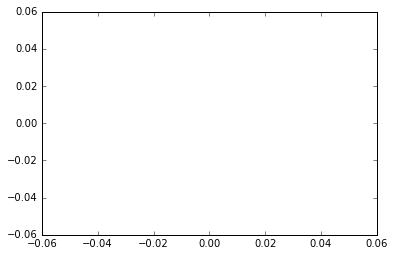

In [139]:
import statsmodels.api as sm
MASTERBBDF['SHOT_RESULT2'] = MASTERBBDF['SHOT_RESULT'].replace(1, 1)
MASTERBBDF['SHOT_RESULT2'] = MASTERBBDF['SHOT_RESULT'].replace(-1, 0)
#cols_to_keep = ['SHOT_RESULT2','SHOT_DIST',"SHOT_CLOCK_test4", "Age"]
cols_to_keep = ['SHOT_RESULT2','SHOT_CLOCK']
data = MASTERBBDF[cols_to_keep]
data = data.as_matrix()

arr1 = data[:,0]
arr2 =data[:,1]

slope, intercept, r_value, p_value, std_err = stats.linregress(arr1, arr2)

print ("Slope: ", slope)
print ("Intercept: ", intercept)
print ("p_value: ", p_value)
print ("std_err: ", std_err)

# It is always a good idea to visualise the model together with the data 
# we can use the polyval function to evaluate our model over the whole set of data points
# What this does is to simply run y = m * x + b function for all our points 
evaluatedLine = np.polyval([slope, intercept], arr1)
plt.rcParams['agg.path.chunksize'] = 10000
# let's see a black line overlaid on the data
plt.plot(arr1, evaluatedLine, 'k-')

/Users/vgulbi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Slope:  -2.88844513974
Intercept:  17.1403090759
p_value:  1.30010423045e-200
std_err:  0.0949345661426


/Users/vgulbi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


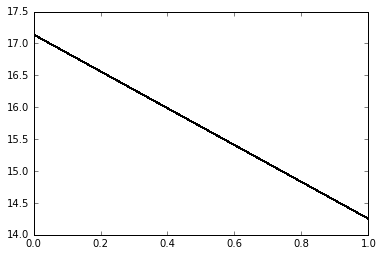

In [137]:
attempt_c = MASTERBBDF[((MASTERBBDF['Pos']=="SG"))]
import statsmodels.api as sm
attempt_c['SHOT_RESULT2'] = attempt_c['SHOT_RESULT'].replace(1, 1)
attempt_c['SHOT_RESULT2'] = attempt_c['SHOT_RESULT'].replace(-1, 0)
#cols_to_keep = ['SHOT_RESULT2','SHOT_DIST',"SHOT_CLOCK_test4", "Age"]
cols_to_keep = ['SHOT_RESULT2','SHOT_DIST']
data = attempt_c[cols_to_keep]
data = data.as_matrix()

arr1 = data[:,0]
arr2 =data[:,1]

slope, intercept, r_value, p_value, std_err = stats.linregress(arr1, arr2)

print ("Slope: ", slope)
print ("Intercept: ", intercept)
print ("p_value: ", p_value)
print ("std_err: ", std_err)

# It is always a good idea to visualise the model together with the data 
# we can use the polyval function to evaluate our model over the whole set of data points
# What this does is to simply run y = m * x + b function for all our points 
evaluatedLine = np.polyval([slope, intercept], arr1)
plt.rcParams['agg.path.chunksize'] = 10000
# let's see a black line overlaid on the data
plt.plot(arr1, evaluatedLine, 'k-')

Slope:  -2.59622555295
Intercept:  9.64975562072
p_value:  4.13380438751e-190
std_err:  0.0874451066391


/Users/vgulbi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/vgulbi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


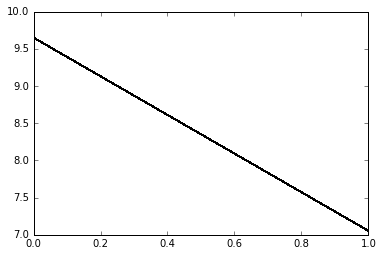

In [138]:
attempt_c = MASTERBBDF[((MASTERBBDF['Pos']=="C"))]
import statsmodels.api as sm
attempt_c['SHOT_RESULT2'] = attempt_c['SHOT_RESULT'].replace(1, 1)
attempt_c['SHOT_RESULT2'] = attempt_c['SHOT_RESULT'].replace(-1, 0)
#cols_to_keep = ['SHOT_RESULT2','SHOT_DIST',"SHOT_CLOCK_test4", "Age"]
cols_to_keep = ['SHOT_RESULT2','SHOT_DIST']
data = attempt_c[cols_to_keep]
data = data.as_matrix()

arr1 = data[:,0]
arr2 =data[:,1]

slope, intercept, r_value, p_value, std_err = stats.linregress(arr1, arr2)

print ("Slope: ", slope)
print ("Intercept: ", intercept)
print ("p_value: ", p_value)
print ("std_err: ", std_err)

# It is always a good idea to visualise the model together with the data 
# we can use the polyval function to evaluate our model over the whole set of data points
# What this does is to simply run y = m * x + b function for all our points 
evaluatedLine = np.polyval([slope, intercept], arr1)
plt.rcParams['agg.path.chunksize'] = 10000
# let's see a black line overlaid on the data
plt.plot(arr1, evaluatedLine, 'k-')

/Users/vgulbi/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found arrays with inconsistent numbers of samples: [     1 151889]

In [154]:
print('Centre')
attempt_c = MASTERBBDF[((MASTERBBDF['Pos']=="C"))]
cols_to_keep = ['SHOT_RESULT2','SHOT_DIST']
data = attempt_c[cols_to_keep]
train_cols = data.columns[1:]
logit = sm.Logit(data['SHOT_RESULT2'], data[train_cols])

# fit the model
result = logit.fit()
result
print (result.summary())

#print (np.exp(result.params))

Centre
Optimization terminated successfully.
         Current function value: 0.687349
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           SHOT_RESULT2   No. Observations:                22910
Model:                          Logit   Df Residuals:                    22909
Method:                           MLE   Df Model:                            0
Date:                Sun, 11 Dec 2016   Pseudo R-squ.:                0.008143
Time:                        20:10:27   Log-Likelihood:                -15747.
converged:                       True   LL-Null:                       -15876.
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
SHOT_DIST     -0.0203      0.001    -16.166      0.000        -0.023    -0.018


In [185]:
from sklearn import linear_model
from sklearn import preprocessing

attempt_c = MASTERBBDF[((MASTERBBDF['Pos']=="C"))]
import statsmodels.api as sm
attempt_c['SHOT_RESULT2'] = attempt_c['SHOT_RESULT'].replace(1, 1)
attempt_c['SHOT_RESULT2'] = attempt_c['SHOT_RESULT'].replace(-1, 0)
#cols_to_keep = ['SHOT_RESULT2','SHOT_DIST',"SHOT_CLOCK_test4", "Age"]
cols_to_keep = ['SHOT_RESULT2','SHOT_DIST']
data = attempt_c[cols_to_keep]
data = data.as_matrix()

arr1 = data[:,0]
arr2 =data[:,1]

# Initialize logistic regression model

log_model = linear_model.LogisticRegression()

# Train the model
log_model.fit(X = arr1, 
              y = arr2)

# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)

/Users/vgulbi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/vgulbi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/vgulbi/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a s

ValueError: Found arrays with inconsistent numbers of samples: [    1 22910]

In [233]:

attempt_c = MASTERBBDF[((MASTERBBDF['Pos']=="C"))]
cols_to_keep = ['SHOT_RESULT2','SHOT_DIST']
data = attempt_c[cols_to_keep]
data = data.as_matrix()
#arr1 = data[['SHOT_RESULT2']][1:22910]
#arr2 = data[['SHOT_DIST']][1:22910]

data = np.ravel(data)
X_train = data[['SHOT_RESULT2']] #define training X set                                                                                                                           
y_train = data[['SHOT_DIST']] #define training y set                                                                                                                          


log_model = linear_model.LogisticRegression()

# Train the model
log_model.fit(y_train, 
              X_train)


/Users/vgulbi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [155]:
print('Odds Ratio')
print(np.exp(result.params))

Odds Ratio
SHOT_DIST    0.979938
dtype: float64


In [152]:
print('Shooting Guard')
attempt_c = MASTERBBDF[((MASTERBBDF['Pos']=="SG"))]
cols_to_keep = ['SHOT_RESULT2','SHOT_DIST']
data = attempt_c[cols_to_keep]
train_cols = data.columns[1:]
logit = sm.Logit(data['SHOT_RESULT2'], data[train_cols])

# fit the model
result = logit.fit()
result
print (result.summary())

#print (np.exp(result.params))

Shooting Guard
Optimization terminated successfully.
         Current function value: 0.671639
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           SHOT_RESULT2   No. Observations:                33753
Model:                          Logit   Df Residuals:                    33752
Method:                           MLE   Df Model:                            0
Date:                Sun, 11 Dec 2016   Pseudo R-squ.:                 0.01575
Time:                        20:09:32   Log-Likelihood:                -22670.
converged:                       True   LL-Null:                       -23033.
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
SHOT_DIST     -0.0233      0.001    -37.434      0.000        -0.024    -0.022


In [153]:
print('Odds Ratio')
print(np.exp(result.params))

Odds Ratio
SHOT_DIST    0.977007
dtype: float64


In [ ]:
model = smf.glm(formula=formula, data=df, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

In [149]:
print ('All')
cols_to_keep = ['SHOT_RESULT2','SHOT_DIST']
data = MASTERBBDF[cols_to_keep]
train_cols = data.columns[1:]
logit = sm.Logit(data['SHOT_RESULT2'], data[train_cols])

# fit the model
result = logit.fit()
result
print (result.summary())

#print (np.exp(result.params))

All
Optimization terminated successfully.
         Current function value: 0.675126
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           SHOT_RESULT2   No. Observations:               151889
Model:                          Logit   Df Residuals:                   151888
Method:                           MLE   Df Model:                            0
Date:                Sun, 11 Dec 2016   Pseudo R-squ.:                 0.01879
Time:                        20:04:01   Log-Likelihood:            -1.0254e+05
converged:                       True   LL-Null:                   -1.0451e+05
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
SHOT_DIST     -0.0238      0.000    -72.693      0.000        -0.024    -0.023


In [150]:
print('Odds Ratio')
print(np.exp(result.params))

Odds Ratio
SHOT_DIST    0.976515
dtype: float64


In [120]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))


                      2.5%     97.5%        OR
SHOT_DIST         0.957284  0.959518  0.958400
SHOT_CLOCK_test4  1.020624  1.024160  1.022390
Age               1.002430  1.004580  1.003504


In [267]:
# module imports
from patsy import dmatrices
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm

# read in the data & create matrices

y, X = dmatrices('SHOT_RESULT2 ~  SHOT_DIST', MASTERBBDF, return_type = 'dataframe')

# sklearn output
model = LogisticRegression(fit_intercept = False, C = 1e9)
mdl = model.fit(X, y)
model.coef_

probs = model.predict_log_proba(X)
probs
predicted = model.predict(X)
print (predicted)
# sm
#logit = sm.Logit(y, X)
#logit.fit().params

print (metrics.accuracy_score(y, predicted))
print (metrics.roc_auc_score(y, probs[:, 1]))

/Users/vgulbi/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 1.  0.  0. ...,  0.  0.  1.]
0.594012732983
0.615670824155


In [224]:
print (metrics.confusion_matrix(y, predicted))
print (metrics.classification_report(y, predicted))

[[55600 28002]
 [33663 34624]]
             precision    recall  f1-score   support

        0.0       0.62      0.67      0.64     83602
        1.0       0.55      0.51      0.53     68287

avg / total       0.59      0.59      0.59    151889



In [231]:
model = LogisticRegression()
model = model.fit(X, y)
model.score(X, y)
y.mean()

/Users/vgulbi/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SHOT_RESULT2    0.449585
dtype: float64

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)
print (predicted)

[ 0.  1.  0. ...,  0.  1.  1.]


/Users/vgulbi/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [270]:
probs = model2.predict_proba(X_test)
print (probs)

df = pd.DataFrame(probs,index=probs[:,0]),
df.plot()

[[ 0.5588746   0.4411254 ]
 [ 0.42466981  0.57533019]
 [ 0.6459171   0.3540829 ]
 ..., 
 [ 0.64289781  0.35710219]
 [ 0.42789226  0.57210774]
 [ 0.43327651  0.56672349]]


AttributeError: 'tuple' object has no attribute 'plot'

In [245]:
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))



0.594092215858
0.617026799625


In [228]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [265]:
Dist = MASTERBBDF[["SHOT_RESULT", "SHOT_DIST"]]

probs = []
for a in Dist["SHOT_DIST"]:
    probs =probs.append((model.predict_proba(1,a)))

TypeError: predict_proba() takes 2 positional arguments but 3 were given

In [ ]:
model.predict_proba(np.array(

In [ ]:
#All shot attempts

shot_dist_bin = MASTERBBDF[((MASTERBBDF['SHOT_RESULT']==1) &(MASTERBBDF['PERIOD']<=4))]
shot_dist_bin2 = MASTERBBDF[(MASTERBBDF['SHOT_RESULT']==-1)]
shot_dist_bin = shot_dist_bin.pivot_table(values = ['SHOT_RESULT'], index=['PERIOD'], aggfunc = 'sum')
shot_dist_bin.reset_index(level=0, inplace=True)
shot_dist_bin

shots_attempted = MASTERBBDF.pivot_table(values = ['shots_attempted'], index=['PERIOD'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


shotperc = pd.merge(shot_dist_bin,shots_attempted,left_on ='PERIOD', right_on ='PERIOD')
shotperc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = shotperc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
shotperc['percentage_shot'] =percentage_shot
shotperc

In [ ]:
#All shot attempts - W

shot_dist_bin = MASTERBBDF[((MASTERBBDF['SHOT_RESULT']==1) &(MASTERBBDF['PERIOD']<=4) &(MASTERBBDF['W']==1))]
shot_dist_bin2 = MASTERBBDF[(MASTERBBDF['W']==1)]
shot_dist_bin = shot_dist_bin.pivot_table(values = ['SHOT_RESULT'], index=['PERIOD'], aggfunc = 'sum')
shot_dist_bin.reset_index(level=0, inplace=True)
shot_dist_bin

shots_attempted = shot_dist_bin2.pivot_table(values = ['shots_attempted'], index=['PERIOD'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


shotperc = pd.merge(shot_dist_bin,shots_attempted,left_on ='PERIOD', right_on ='PERIOD')
shotperc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = shotperc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
shotperc['percentage_shot'] =percentage_shot
shotperc

In [ ]:
#All shot attempts - W

shot_dist_bin = MASTERBBDF[((MASTERBBDF['SHOT_RESULT']==1) &(MASTERBBDF['PERIOD']<=4) &(MASTERBBDF['W']==-1))]
shot_dist_bin2 = MASTERBBDF[(MASTERBBDF['W']==-1)]
shot_dist_bin = shot_dist_bin.pivot_table(values = ['SHOT_RESULT'], index=['PERIOD'], aggfunc = 'sum')
shot_dist_bin.reset_index(level=0, inplace=True)
shot_dist_bin

shots_attempted = shot_dist_bin2.pivot_table(values = ['shots_attempted'], index=['PERIOD'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


shotperc = pd.merge(shot_dist_bin,shots_attempted,left_on ='PERIOD', right_on ='PERIOD')
shotperc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = shotperc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
shotperc['percentage_shot'] =percentage_shot
shotperc

In [ ]:
#All shot attempts -  JONAS VALANCIUNAS

shot_dist_bin = MASTERBBDF[((MASTERBBDF['SHOT_RESULT']==1) &(MASTERBBDF['Player']=='JONAS VALANCIUNAS'))]
shot_dist_bin2 = MASTERBBDF[(MASTERBBDF['Player']=='JONAS VALANCIUNAS')]
shot_dist_bin = shot_dist_bin.pivot_table(values = ['SHOT_RESULT'], index=['shot_dist_bin'], aggfunc = 'sum')
shot_dist_bin.reset_index(level=0, inplace=True)
shot_dist_bin

shots_attempted = shot_dist_bin2.pivot_table(values = ['shots_attempted'], index=['shot_dist_bin'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


shotperc = pd.merge(shot_dist_bin,shots_attempted,left_on ='shot_dist_bin', right_on ='shot_dist_bin')
shotperc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = shotperc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
shotperc['percentage_shot'] =percentage_shot
shotperc

In [ ]:
shot_dist_bin2.max()

In [ ]:
# 2 point shots
shot_dist_bin = MASTERBBDF[((MASTERBBDF['SHOT_RESULT']==1)& (MASTERBBDF['PTS_TYPE']==2))]
shot_dist_bin2 = MASTERBBDF[((MASTERBBDF['PTS_TYPE']==2) )]
shot_dist_bin = shot_dist_bin.pivot_table(values = ['SHOT_RESULT'], index=['shot_dist_bin'], aggfunc = 'sum')
shot_dist_bin.reset_index(level=0, inplace=True)
shot_dist_bin

shots_attempted = shot_dist_bin2.pivot_table(values = ['shots_attempted'], index=['shot_dist_bin'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


shotperc = pd.merge(shot_dist_bin,shots_attempted,left_on ='shot_dist_bin', right_on ='shot_dist_bin')
shotperc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = shotperc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
shotperc['percentage_shot'] =percentage_shot
shotperc


In [ ]:
# 2 point shots Loser

shot_dist_bin = MASTERBBDF[((MASTERBBDF['SHOT_RESULT']==1)& (MASTERBBDF['W']==-1)&  (MASTERBBDF['PTS_TYPE']==2)& (MASTERBBDF['PERIOD']<=4))]
shot_dist_bin2 = MASTERBBDF[((MASTERBBDF['PTS_TYPE']==2) & (MASTERBBDF['W']==-1)&  (MASTERBBDF['PERIOD']<=4))]
shot_dist_bin = shot_dist_bin.pivot_table(values = ['SHOT_RESULT'], index=['PERIOD'], aggfunc = 'sum')
shot_dist_bin.reset_index(level=0, inplace=True)
shot_dist_bin

shots_attempted = shot_dist_bin2.pivot_table(values = ['shots_attempted'], index=['PERIOD'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


shotperc = pd.merge(shot_dist_bin,shots_attempted,left_on ='PERIOD', right_on ='PERIOD')
shotperc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = shotperc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
shotperc['percentage_shot'] =percentage_shot
shotperc

In [ ]:
# 2 point shots WINNER

shot_dist_bin = MASTERBBDF[((MASTERBBDF['SHOT_RESULT']==1)& (MASTERBBDF['W']==1)&  (MASTERBBDF['PTS_TYPE']==2)& (MASTERBBDF['PERIOD']<=4))]
shot_dist_bin2 = MASTERBBDF[((MASTERBBDF['PTS_TYPE']==2) & (MASTERBBDF['W']==1)&  (MASTERBBDF['PERIOD']<=4))]
shot_dist_bin = shot_dist_bin.pivot_table(values = ['SHOT_RESULT'], index=['PERIOD'], aggfunc = 'sum')
shot_dist_bin.reset_index(level=0, inplace=True)
shot_dist_bin

shots_attempted = shot_dist_bin2.pivot_table(values = ['shots_attempted'], index=['PERIOD'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


shotperc = pd.merge(shot_dist_bin,shots_attempted,left_on ='PERIOD', right_on ='PERIOD')
shotperc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = shotperc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
shotperc['percentage_shot'] =percentage_shot
shotperc

In [ ]:
#3 point 

shot_dist_bin = MASTERBBDF[((MASTERBBDF['SHOT_RESULT']==1)& (MASTERBBDF['PTS_TYPE']==3))]
shot_dist_bin2 = MASTERBBDF[((MASTERBBDF['PTS_TYPE']==3) )]
shot_dist_bin = shot_dist_bin.pivot_table(values = ['SHOT_RESULT'], index=['shot_dist_bin'], aggfunc = 'sum')
shot_dist_bin.reset_index(level=0, inplace=True)
shot_dist_bin

shots_attempted = shot_dist_bin2.pivot_table(values = ['shots_attempted'], index=['shot_dist_bin'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


shotperc = pd.merge(shot_dist_bin,shots_attempted,left_on ='shot_dist_bin', right_on ='shot_dist_bin')
shotperc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = shotperc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
shotperc['percentage_shot'] =percentage_shot
shotperc

In [ ]:
#3 point loser

shot_dist_bin = MASTERBBDF[((MASTERBBDF['SHOT_RESULT']==1)& (MASTERBBDF['PTS_TYPE']==3) & (MASTERBBDF['W']==-1)& (MASTERBBDF['PERIOD']<=4))]
shot_dist_bin2 = MASTERBBDF[((MASTERBBDF['PTS_TYPE']==3) & (MASTERBBDF['W']==-1)& (MASTERBBDF['PERIOD']<=4))]
shot_dist_bin = shot_dist_bin.pivot_table(values = ['SHOT_RESULT'], index=['PERIOD'], aggfunc = 'sum')
shot_dist_bin.reset_index(level=0, inplace=True)
shot_dist_bin

shots_attempted = shot_dist_bin2.pivot_table(values = ['shots_attempted'], index=['PERIOD'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


shotperc = pd.merge(shot_dist_bin,shots_attempted,left_on ='PERIOD', right_on ='PERIOD')
shotperc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = shotperc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
shotperc['percentage_shot'] =percentage_shot
shotperc

In [ ]:
#3 point winner

shot_dist_bin = MASTERBBDF[((MASTERBBDF['SHOT_RESULT']==1)& (MASTERBBDF['PTS_TYPE']==3) & (MASTERBBDF['W']==1)& (MASTERBBDF['PERIOD']<=4))]
shot_dist_bin2 = MASTERBBDF[((MASTERBBDF['PTS_TYPE']==3) & (MASTERBBDF['W']==1)& (MASTERBBDF['PERIOD']<=4))]
shot_dist_bin = shot_dist_bin.pivot_table(values = ['SHOT_RESULT'], index=['PERIOD'], aggfunc = 'sum')
shot_dist_bin.reset_index(level=0, inplace=True)
shot_dist_bin

shots_attempted = shot_dist_bin2.pivot_table(values = ['shots_attempted'], index=['PERIOD'], aggfunc = 'sum')
shots_attempted.reset_index(level=0, inplace=True)
shots_attempted


shotperc = pd.merge(shot_dist_bin,shots_attempted,left_on ='PERIOD', right_on ='PERIOD')
shotperc

def percentage_shot(a,b):
    return (a/b)*100

percentage_shot = shotperc.apply(lambda x: percentage_shot(x['SHOT_RESULT'],x['shots_attempted']), axis=1)
shotperc['percentage_shot'] =percentage_shot
shotperc

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis
iris = load_iris()
X, y = iris.data, iris.target
factor = FactorAnalysis(n_components=4, random_state=101).fit(X)
factor

In [ ]:
#3 point winner

pt3tm = MASTERBBDF[((MASTERBBDF['PTS_TYPE']==3))]
pt3tm = pt3tm.pivot_table(values = ['shots_attempted'], index=['Tm'], aggfunc = 'sum')
pt3tm.reset_index(level=0, inplace=True)
pt3tm.min()

pt3tm = MASTERBBDF[((MASTERBBDF['PTS_TYPE']==3)&(MASTERBBDF['SHOT_RESULT']==1))]
pt3tm = pt3tm.pivot_table(values = ['shots_attempted'], index=['Tm'], aggfunc = 'sum')
pt3tm.reset_index(level=0, inplace=True)
pt3tm.max()


### 